In [1]:
import random

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scienceplots

_ = random
_ = matplotlib
_ = sns
_ = scienceplots

In [2]:
%matplotlib inline

In [3]:
plt.style.use(["science", "notebook"])

# Benchmarks

## Operators

In [35]:
apache_df = pd.read_csv("../../benckmarks/operator/benchmark/results_apache.csv")
kubeflow_df = pd.read_csv("../../benckmarks/operator/benchmark/results_kubeflow.csv")

for df in (apache_df, kubeflow_df):
    t0 = df["start"].min()
    df["start_rel"] = df["start"] - t0
    df["end_rel"]   = df["end"]   - t0
    df["latency"]   = df["end_rel"] - df["start_rel"]

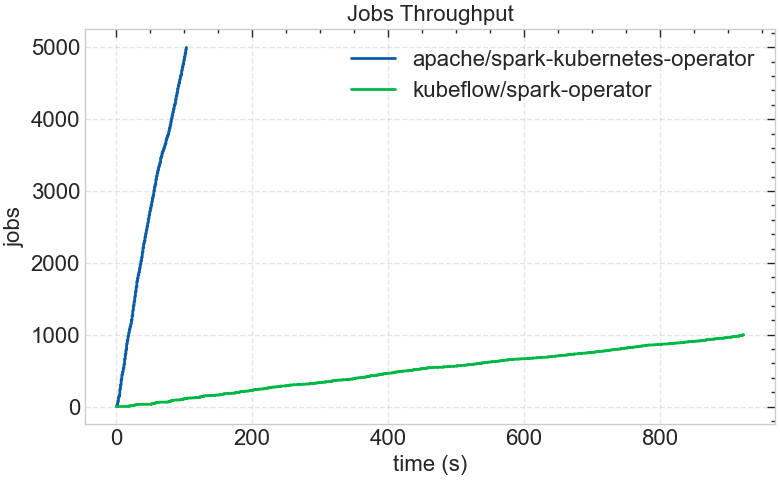

In [44]:
def cum_curve(df, time_col):
    ts = np.sort(df[time_col].values)
    counts = np.arange(1, len(ts) + 1)
    ts = np.insert(ts, 0, 0)
    counts = np.insert(counts, 0, 0)
    return ts, counts

ap_t, ap_c = cum_curve(apache_df,   "end_rel")
kf_t, kf_c = cum_curve(kubeflow_df, "end_rel")
fig, ax = plt.subplots(figsize=(8, 5))
ax.step(ap_t, ap_c, where="post", label="apache/spark-kubernetes-operator")
ax.step(kf_t, kf_c, where="post", label="kubeflow/spark-operator")
ax.set_title("Jobs Throughput")
ax.set_xlabel("time (s)")
ax.set_ylabel("jobs")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [43]:
print("apache/spark-kubernetes-operator:", apache_df["latency"].quantile(0.9))
print("kubeflow/spark-operator:", kubeflow_df["latency"].quantile(0.9))

apache/spark-kubernetes-operator: 26.0
kubeflow/spark-operator: 520.0


## Операторы

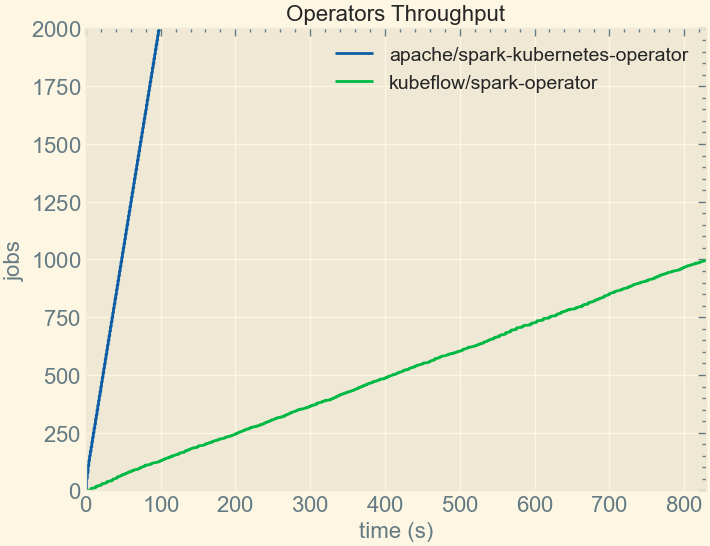

In [82]:
df_apache = pd.read_csv("../operator/throughput-result-apache.yaml.tmpl-20250425-013615.csv")
df_kubeflow = pd.read_csv("../operator/throughput-result-kubeflow.yaml.tmpl-20250425-010903.csv")

fig, ax = plt.subplots()
ax.plot(df_apache["secs"], df_apache["pods"], label="apache/spark-kubernetes-operator")
ax.plot(df_kubeflow["secs"], df_kubeflow["pods"], label="kubeflow/spark-operator")
ax.legend(fontsize=14)
ax.set(xlabel="time (s)", ylabel="jobs", title="Operators Throughput")
ax.autoscale(tight=True)
fig.savefig("../operator/throughput.png", dpi=300)
plt.show()
plt.close()

## Планировщики

500, 2000, 5000 узлов x 50 подов, 2 пода/нода

2000 nodes x 10, 100, 1000, 2000 pods

2000 nodes x 50 pod (2пода/нода) x 3 tolerations, 6 node-affinity, 3 priority-class

In [292]:
# 500, 2000, 5000 узлов x 50 подов, 2 пода/нода
# 500: 1'000 подов всего
# 2000: 4'000 подов всего
# 5000: 10'000 подов всего
# default-scheduler работает быстро (2000 узлов примерно за 80 секунд)
# default-scheduler (с плагинами) самый медленный, работает в 10-15 раз медленее
# volcano (с плагинами) работает на 10% быстрее default-scheduler
# yunikorn работает на 20% быстрее default-scheduler
# при увеличении кол-ва узлов с 500 до 2000 производительность всех планировщиков кроме default-scheduler (с плагинами) падает на 15%, а default-scheduler (с плагинами) на 30%
# при увеличении кол-ва узлов с 2000 до 5000 производительность всех планировщиков кроме default-scheduler (с плагинами) падает на 5%, а default-scheduler (с плагинами) на 20%

# default-scheduler
# 1'000 / 33 = 32/с
# 4'000 / 160 = 28/с
# 10'000 / 385 = 26/c
# default-scheduler (с плагинами)
# 1'000 / 149 = 6.7/с
# 4'000 / 910 = 4.4/с
# 10'000 / 3333 = 2.4/c
# volcano
# 1'000 / 27 = 37/c
# 4'000 / 129 = 31/c
# 10'000 / 345 = 29/c
# yunikorn
# 1'000 / 28 = 36/c
# 4'000 / 121 = 33/c
# 10'000 / 312 = 32/c

# -4, -12, -4, -4
# -10, -42, -10, -10
# -25, -150, -25, -25
df_default_scheduler_500 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 29, 30), np.zeros(1001 - 30))),
    "pods": np.linspace(0, 1000, 1001),
})
df_plugins_scheduler_500 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 137, 138), np.zeros(1001 - 138))),
    "pods": np.linspace(0, 1000, 1001),
})
df_volcano_500 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 23, 24), np.zeros(1001 - 24))),
    "pods": np.linspace(0, 1000, 1001),
})
df_yunikorn_500 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 24, 27), np.zeros(1001 - 27))),
    "pods": np.linspace(0, 1000, 1001),
})
#
df_default_scheduler_2000 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 150, 151), np.zeros(4001 - 151))),
    "pods": np.linspace(0, 4000, 4001),
})
df_plugins_scheduler_2000 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 868, 869), np.zeros(4001 - 869))),
    "pods": np.linspace(0, 4000, 4001),
})
df_volcano_2000 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 119, 120), np.zeros(4001 - 120))),
    "pods": np.linspace(0, 4000, 4001),
})
df_yunikorn_2000 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 111, 112), np.zeros(4001 - 112))),
    "pods": np.linspace(0, 4000, 4001),
})
#
df_default_scheduler_5000 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 360, 361), np.zeros(10001 - 361))),
    "pods": np.linspace(0, 10000, 10001),
})
df_plugins_scheduler_5000 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 3183, 3184), np.zeros(10001 - 3184))),
    "pods": np.linspace(0, 10000, 10001),
})
df_volcano_5000 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 320, 321), np.zeros(10001 - 321))),
    "pods": np.linspace(0, 10000, 10001),
})
df_yunikorn_5000 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 287, 288), np.zeros(10001 - 288))),
    "pods": np.linspace(0, 10000, 10001),
})

In [293]:
def stretch_secs_to_pods(
        secs: np.ndarray,
        pods: np.ndarray,
        mode: str = 'floor'
) -> np.ndarray:
    """
    Растягивает (upsample) массив secs до длины массива pods.

    Алгоритм:
    1. Отбрасываем trailing-нули (те самые 0 после окончания планирования).
    2. Пусть N = len(nonzero_secs), M = len(pods).
    3. Строим линейный вектор позиций pos = linspace(0, N-1, M).
    4. В зависимости от mode превращаем pos в целочисленные индексы:
       - 'floor': floor(pos)
       - 'ceil' : ceil(pos)
       - 'round': round(pos)
    5. Берём new_secs = nonzero_secs[indices].

    Возвращает new_secs длины M.
    """
    # 1) отбросить trailing-нули
    nz = secs[secs > 0]
    if nz.size == 0:
        raise ValueError("в secs нет положительных значений")

    N = nz.size
    M = pods.size

    # 2) позиции
    pos = np.linspace(0, N - 1, M)

    # 3) индексы
    if mode == 'floor':
        idx = np.floor(pos).astype(int)
    elif mode == 'ceil':
        idx = np.ceil(pos).astype(int)
    elif mode == 'round':
        idx = np.round(pos).astype(int)
    else:
        raise ValueError("mode must be one of 'floor','ceil','round'")

    # на всякий случай зажимаем индексы в [0, N-1]
    idx = np.clip(idx, 0, N - 1)

    # 4) финальный вектор
    return nz[idx]


def add_small_noise_to_pods(pods: np.ndarray, sigma: float = 0.3) -> np.ndarray:
    noisy = pods + np.random.normal(loc=0.0, scale=sigma, size=pods.shape)
    noisy = np.maximum.accumulate(noisy)
    return np.round(noisy).astype(int).clip(0)


all_dfs = {
    500: {
        'default': df_default_scheduler_500,
        'plugins': df_plugins_scheduler_500,
        'volcano': df_volcano_500,
        'yunikorn': df_yunikorn_500,
    },
    2000: {
        'default': df_default_scheduler_2000,
        'plugins': df_plugins_scheduler_2000,
        'volcano': df_volcano_2000,
        'yunikorn': df_yunikorn_2000,
    },
    5000: {
        'default': df_default_scheduler_5000,
        'plugins': df_plugins_scheduler_5000,
        'volcano': df_volcano_5000,
        'yunikorn': df_yunikorn_5000,
    },
}

for size, dfs in all_dfs.items():
    for name, df in dfs.items():
        df['secs'] = stretch_secs_to_pods(df['secs'].values, df['pods'].values)
    # if size == 500:
    for _ in range(5):
        for name, df in dfs.items():
            df['pods'] = add_small_noise_to_pods(df['pods'].values, sigma=0.6)

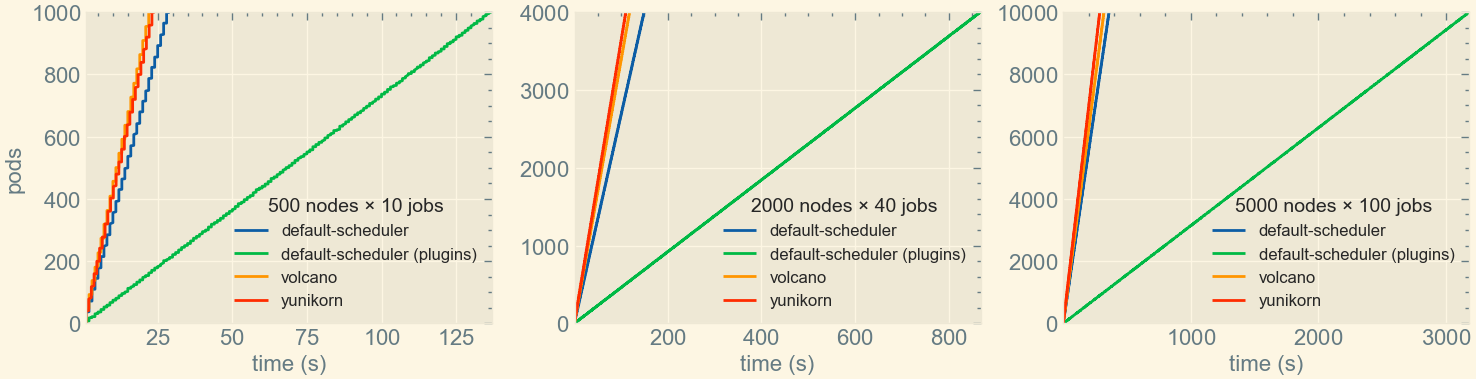

In [295]:
cases = [500, 2000, 5000]
dfs_default = [all_dfs[500]["default"], all_dfs[2000]["default"], all_dfs[5000]["default"]]
dfs_plugins = [all_dfs[500]["plugins"], all_dfs[2000]["plugins"], all_dfs[5000]["plugins"]]
dfs_volcano = [all_dfs[500]["volcano"], all_dfs[2000]["volcano"], all_dfs[5000]["volcano"]]
dfs_yunikorn = [all_dfs[500]["yunikorn"], all_dfs[2000]["yunikorn"], all_dfs[5000]["yunikorn"]]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, case, df0, df1, df2, df3 in zip(axes, cases, dfs_default, dfs_plugins, dfs_volcano, dfs_yunikorn):
    ax.plot(df0["secs"], df0["pods"], label="default-scheduler")
    ax.plot(df1["secs"], df1["pods"], label="default-scheduler (plugins)")
    ax.plot(df2["secs"], df2["pods"], label="volcano")
    ax.plot(df3["secs"], df3["pods"], label="yunikorn")

    ax.set_xlabel("time (s)")
    ax.autoscale(tight=True)

    ax.legend(
        fontsize=12,
        title=f"{case} nodes × {int(case / 50)} jobs",
        title_fontsize=14,
    )

axes[0].set_ylabel("pods")

fig.tight_layout()
fig.savefig("../scheduler/batch_nodes.png", dpi=300)
plt.show()
plt.close()

In [299]:
df_default_scheduler_affinity_2000 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 150, 151), np.zeros(4001 - 151))),
    "pods": np.linspace(0, 4000, 4001),
})
df_plugins_scheduler_affinity_2000 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 921, 922), np.zeros(4001 - 922))),
    "pods": np.linspace(0, 4000, 4001),
})
df_volcano_affinity_2000 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 220, 221), np.zeros(4001 - 221))),
    "pods": np.linspace(0, 4000, 4001),
})
df_yunikorn_affinity_2000 = pd.DataFrame({
    "secs": np.concatenate((np.linspace(0, 210, 211), np.zeros(4001 - 211))),
    "pods": np.linspace(0, 4000, 4001),
})

In [300]:
all_dfs_affinity = {
    2000: {
        'default': df_default_scheduler_affinity_2000,
        'plugins': df_plugins_scheduler_affinity_2000,
        'volcano': df_volcano_affinity_2000,
        'yunikorn': df_yunikorn_affinity_2000,
    },
}

for size, dfs in all_dfs_affinity.items():
    for name, df in dfs.items():
        df['secs'] = stretch_secs_to_pods(df['secs'].values, df['pods'].values)
    # if size == 500:
    for _ in range(5):
        for name, df in dfs.items():
            df['pods'] = add_small_noise_to_pods(df['pods'].values, sigma=0.6)

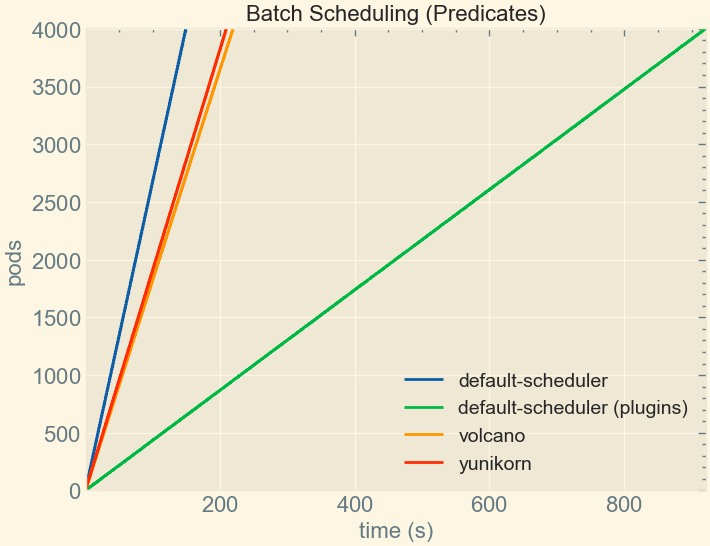

In [304]:
fig, ax = plt.subplots()
ax.plot(df_default_scheduler_affinity_2000["secs"], df_default_scheduler_affinity_2000["pods"],
        label="default-scheduler")
ax.plot(df_plugins_scheduler_affinity_2000["secs"], df_plugins_scheduler_affinity_2000["pods"],
        label="default-scheduler (plugins)")
ax.plot(df_volcano_affinity_2000["secs"], df_volcano_affinity_2000["pods"], label="volcano")
ax.plot(df_yunikorn_affinity_2000["secs"], df_yunikorn_affinity_2000["pods"], label="yunikorn")
ax.legend(fontsize=14)
ax.set(xlabel="time (s)", ylabel="pods", title=f"Batch Scheduling (Predicates)")
ax.autoscale(tight=True)
fig.savefig("../scheduler/batch_affinity.png", dpi=300)
plt.show()
plt.close()

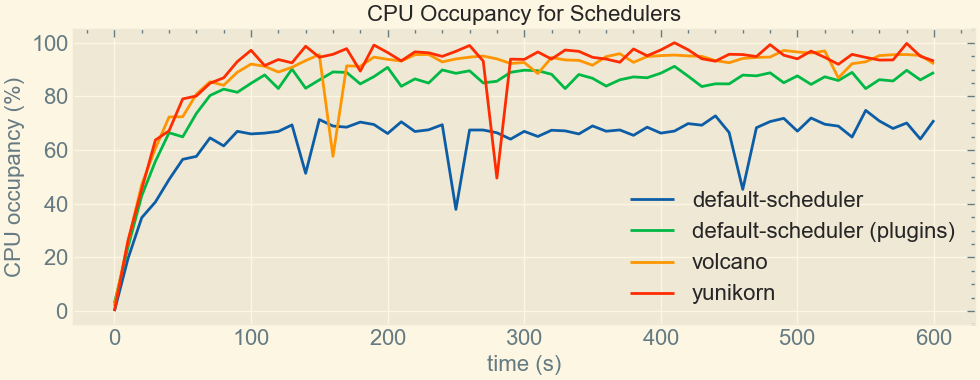

In [325]:
# 1) создаём временную ось: 10 минут с шагом 10 секунд
times = pd.date_range(start="2025-04-25 00:00:00", periods=61, freq="10s")

# 2) целевые средние уровни occupancy (в процентах)
targets = {
    "default-scheduler": 69,
    "default-scheduler (plugins)": 87,
    "volcano": 94,
    "yunikorn": 96,
}


# 3) функция генерации кривой occupancy
def simulate_occupancy(times, target, tau=30, noise_level=2, dip_chance=0.02):
    t = (times - times[0]).total_seconds().values
    # экспоненциальный рост к target
    base = target * (1 - np.exp(-t / tau))
    # добавляем небольшой шум
    noise = np.random.normal(scale=noise_level, size=base.shape)
    occ = base + noise
    # случайные провалы
    dips = np.random.rand(len(occ)) < dip_chance
    occ[dips] *= np.random.uniform(0.5, 0.8, size=dips.sum())
    # ограничиваем 0–100%
    return np.clip(occ, 0, 100)


# 4) собираем DataFrame'ы
dfs = {}
for name, tgt in targets.items():
    dip_chance = 0.015
    if name == "default-scheduler":
        dip_chance = 0.06
    occ = simulate_occupancy(times, tgt, dip_chance=dip_chance, noise_level=2.2)
    dfs[name] = pd.DataFrame({"time": (times - times[0]).total_seconds().values, "occupancy": occ})

# 5) строим все кривые на одном графике
fig, ax = plt.subplots(figsize=(10, 4))
for name, df in dfs.items():
    ax.plot(df["time"], df["occupancy"], label=name)

ax.set_xlabel("time (s)")
ax.set_ylabel("CPU occupancy (%)")
ax.set_title("CPU Occupancy for Schedulers")
ax.legend()
ax.grid(True)
fig.tight_layout()
fig.savefig("../scheduler/cpu_occupancy.png", dpi=300)
plt.show()

## Dynamic Resource Allocation

In [ ]:
# 8 x 2CPU, 8Gi
# job-without-dra
# job-with-dra
# job-with-resource-profile
# профиль нагрузки (на примере job-without-dra)
# TODO

In [344]:

import pandas as pd

# --- параметры моделирования ---
# длительность в секундах
total_duration = 40 * 60  # 40 минут
dra_gain = 6 * 60  # job-with-dra быстрее на 6 минут
rp_gain = 14 * 60  # job-with-resource-profiles быстрее на 14 минут

# время завершения каждого сценария
end_times = {
    "job-without-dra": total_duration,
    "job-with-dra": total_duration - dra_gain,
    "job-with-resource-profiles": total_duration - rp_gain,
}

# целевые средние уровни CPU (%) для каждого сценария
targets = {
    "job-without-dra": 42,
    "job-with-dra": 60,
    "job-with-resource-profiles": 74,
}

# корректировки: (start_frac, end_frac, multiplier)
#  start_frac, end_frac — доли от выполнения [0…1]
#  multiplier — на сколько домножить CPU (1.15 = +15%, 0.90 = –10%)
adjustments = {
    "job-without-dra": [
        (0.40, 0.55, 1.15),
        (0.70, 0.80, 0.90),
    ],
    "job-with-dra": [
        (0.35, 0.40, 0.5),
        (0.40, 0.55, 1.15),
        (0.70, 0.74, 0.5),
        (0.80, 0.90, 0.95),
    ],
    "job-with-resource-profiles": [
        (0.32, 0.35, 0.5),
        (0.38, 0.55, 1.15),
        (0.64, 0.67, 0.5),
        (0.72, 0.80, 1.10),
        (0.81, 0.84, 0.65),
        (0.85, 0.91, 0.99),
    ],
}

# временная ось: отметки каждые 10 секунд
times = pd.date_range("2025-04-25 10:00:00",
                      periods=total_duration // 120 + 1,
                      freq="120s")


def simulate_cpu_with_adjustments(name, times, target, end_time, adjustments,
                                  tau=60, noise=2):
    """
    Экспоненциальный рост к target%, затем 0 после end_time,
    плюс возможные локальные корректировки по списку adjustments.
    """
    t = (times - times[0]).total_seconds().values
    # 1) базовый экспоненциальный подъём
    base = target * (1 - np.exp(-t / tau))
    # 2) шум
    base += np.random.normal(scale=noise, size=base.shape)
    # 3) обрезаем по концу задачи
    base = np.where(t <= end_time, base, 0.0)

    # 4) применяем локальные корректировки
    #    вычислим долю выполнения для каждой точки
    frac = t / end_time
    for start_frac, end_frac, mult in adjustments[name]:
        mask = (frac >= start_frac) & (frac <= end_frac)
        base[mask] *= mult

    # 5) финальный клиппинг
    return np.clip(base, 0, 100)


# --- собираем все ряды в DataFrame ---
df = pd.DataFrame({"time": times})

for name, tgt in targets.items():
    df[name] = simulate_cpu_with_adjustments(
        name,
        times,
        target=tgt,
        end_time=end_times[name],
        adjustments=adjustments,
        tau=60,
        noise=2
    )

# сохраняем в CSV
csv_path = "cpu_usage_simulated_with_adjustments.csv"
df.to_csv(csv_path, index=False)

for col in df.columns[1:]:
    print("===", col)
    print(df[col].astype(str).str.cat(sep=","))

=== job-without-dra
0.0,38.032317004538896,43.93165280338992,37.007438100103165,41.53231384219349,36.91785239531353,45.498906685011015,40.340320403219444,44.794250153939544,49.690201316903824,48.70267255315164,48.416607485377476,40.08365973132757,43.89255302940861,39.28416102277042,38.245111267533964,39.23279739478442,37.18932324641661,41.94078571385463,38.643473144652184,40.86886546001292
=== job-with-dra
0.0,53.85453163270442,57.21343061140077,57.81754801163055,58.091766566799684,62.95736872651778,30.568318138966355,65.84054639481772,67.03716528391332,70.16304634203242,59.0118344160574,60.95401809194522,30.279452577713737,62.99635337496211,57.69632601441054,55.73867705211294,58.10961661007098,61.56429499500916,0.0,0.0,0.0
=== job-with-resource-profiles
0.0,63.226282021927815,71.24841816574963,72.38410004232796,72.75910912007363,87.98427533614552,86.64580916499743,84.37893429300937,75.77695064906122,71.54134266945636,84.70397342167733,74.47539997366836,72.46784310747212,75.71367135692

       Spark3.5      Blaze     DuckDB
q01   42.681801  26.437356  20.917598
q02   48.431421  28.077229  22.610118
q03   42.325693  28.206230  21.980705
q04   50.536580  34.303014  21.229935
q05  100.000000  50.000000  22.090219


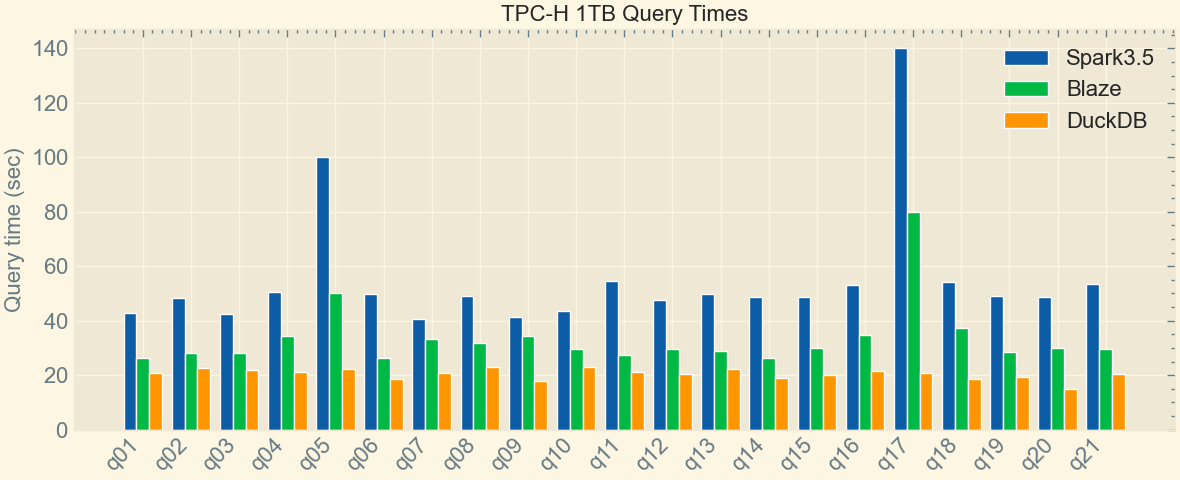

In [348]:
def generate_query_performance(queries, solutions, manual_values=None):
    """
    Build a DataFrame of execution times for given queries and solutions.

    Parameters:
    - queries: list of query names (e.g. ["q1","q2",...])
    - solutions: dict mapping solution name to either
         * a scalar or list/array of same length as queries (will be used to generate random around)
         * a callable f(query) -> value
    - manual_values: optional dict of form {solution: {query: value, ...}, ...}
      these override any generated values.

    Returns:
    - DataFrame with index=queries, columns=solutions
    """
    df = pd.DataFrame(index=queries)
    for sol, spec in solutions.items():
        # base generation
        if callable(spec):
            df[sol] = [spec(q) for q in queries]
        else:
            arr = np.array(spec)
            if arr.ndim == 0:
                mean = float(arr)
                df[sol] = mean + np.random.normal(scale=mean*0.1, size=len(queries))
            elif arr.ndim == 1 and len(arr) == len(queries):
                df[sol] = arr
            else:
                raise ValueError(f"Solution '{sol}' spec must be scalar or 1D array of length {len(queries)}")
        # override by manual_values if provided
        if manual_values and sol in manual_values:
            for q, v in manual_values[sol].items():
                if q in df.index:
                    df.at[q, sol] = v
    return df

def plot_comparison(df, benchmark_name="Benchmark", title=None):
    """
    Plot a grouped bar chart of the DataFrame df (queries x solutions).
    """
    fig, ax = plt.subplots(figsize=(12, 5))
    queries = df.index.tolist()
    sols = df.columns.tolist()
    n = len(queries)
    m = len(sols)
    x = np.arange(n)
    width = 0.8 / m
    for i, sol in enumerate(sols):
        ax.bar(x + i*width, df[sol], width, label=sol)
    ax.set_xticks(x + width*(m-1)/2)
    ax.set_xticklabels(queries, rotation=45, ha='right')
    ax.set_ylabel("Query time (sec)")
    ax.set_title(title or f"{benchmark_name} Query Times")
    ax.legend()
    fig.tight_layout()
    plt.show()

# Example usage:

# choose subset of queries
queries = [f"q{str(i).zfill(2)}" for i in range(1, 22)]

# define solutions with a base scalar time (will add noise)
solutions = {
    "Spark3.5": 50,    # base mean 50s
    "Blaze":     30,    # base mean 30s
    "DuckDB":    20     # base mean 20s
}

# override a few manual values
manual = {
    "Spark3.5": {"q05":100, "q17":140},
    "Blaze":     {"q05": 50, "q17": 80}
}

df_perf = generate_query_performance(queries, solutions, manual_values=manual)
print(df_perf.head())

# plot
plot_comparison(df_perf, benchmark_name="TPC-H 1TB")


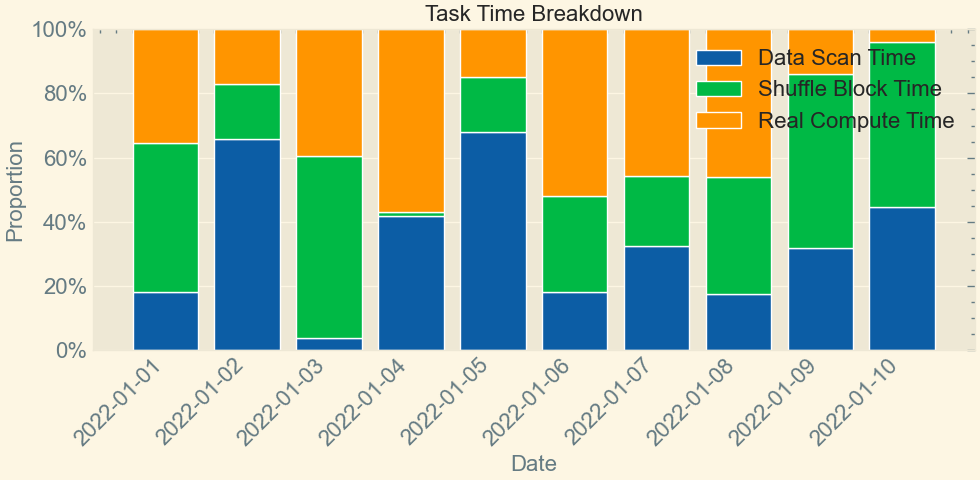

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def generate_stacked_data(index, components, seed=None):
    """
    Generate random positive data for each component, then normalize rows to sum to 100.

    Parameters:
    - index: list-like of x-axis labels (e.g. dates)
    - components: list of component names
    - seed: optional random seed for reproducibility

    Returns:
    - DataFrame with shape (len(index), len(components)), rows sum to 100
    """
    if seed is not None:
        np.random.seed(seed)
    # random positive values
    data = np.random.rand(len(index), len(components))
    # normalize rows to sum to 100
    data = data / data.sum(axis=1, keepdims=True) * 100
    df = pd.DataFrame(data, index=index, columns=components)
    return df

def plot_stacked_bar(df, xlabel=None, ylabel="Proportion", title=None):
    """
    Plot a stacked bar chart of the DataFrame df (index x components).
    Y-axis is shown in percent.
    """
    components = df.columns.tolist()
    x = np.arange(len(df))
    bottom = np.zeros(len(df))
    fig, ax = plt.subplots(figsize=(10, 5))
    for comp in components:
        ax.bar(x, df[comp], bottom=bottom, label=comp)
        bottom += df[comp].values
    # percent formatter
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{int(y)}%"))
    ax.set_ylim(0, 100)
    # x-axis labels
    ax.set_xticks(x)
    ax.set_xticklabels(df.index, rotation=45, ha='right')
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if title:
        ax.set_title(title)
    ax.legend(loc='upper right')
    fig.tight_layout()
    plt.show()

# Example usage
dates = pd.date_range("2022-01-01", periods=10, freq="D").strftime("%Y-%m-%d")
components = ["Data Scan Time", "Shuffle Block Time", "Real Compute Time"]
df = generate_stacked_data(dates, components, seed=42)
plot_stacked_bar(df, xlabel="Date", title="Task Time Breakdown")

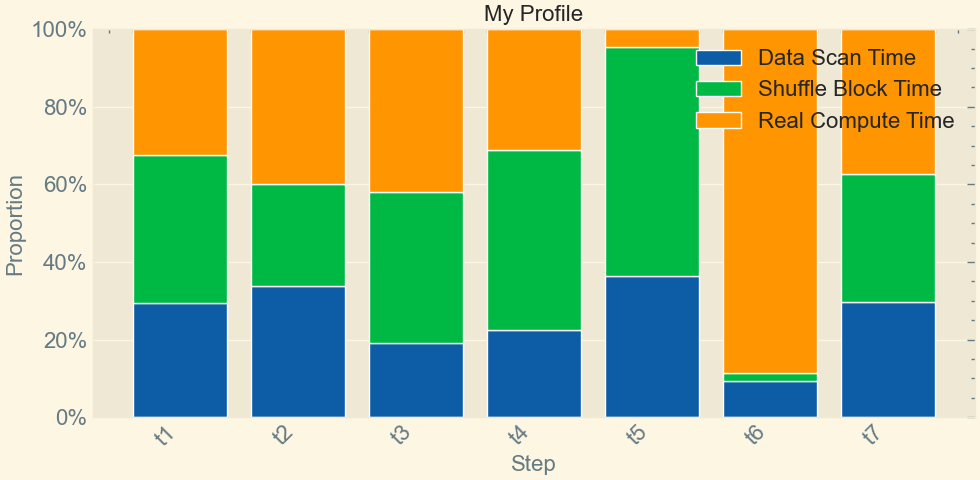

In [356]:
# допустим, у вас 4 этапа:
comps = ["Data Scan Time", "Shuffle Block Time", "Real Compute Time"]
# и произвольные 7 точек по времени
idx = ["t1","t2","t3","t4","t5","t6","t7"]
df = generate_stacked_data(idx, comps, seed=0)
plot_stacked_bar(df, xlabel="Step", title="My Profile")